## Import những thư viện cần thiết

In [1]:
import pandas as pd # thư viện làm việc với dữ liệu dạng bảng
import numpy as np # thư viện tối ưu hóa tính toán trên mảng 
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ
import seaborn as sns # thư viện vẽ biểu đồ
import math # thư viện toán có sẵn
from sklearn.model_selection import train_test_split # hàm chia dữ liệu
from sklearn.linear_model import LinearRegression # mô hình hồi quy tuyến tính
from sklearn.metrics import r2_score # hệ số R² để đánh giá mô hình

## Load dữ liệu lên để sử dụng

In [2]:
df = pd.read_csv('euro_it_salary_2020.csv', index_col=0)
df

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary
0,26.0,Male,5,TypeScript,75000.0
1,26.0,Male,7,Ruby,82000.0
2,29.0,Male,12,Javascript / Typescript,100000.0
3,28.0,Male,4,Javascript,NaN
4,37.0,Male,17,C# .NET,62000.0
...,...,...,...,...,...
1248,31.0,Male,9,Java,70000.0
1249,33.0,Male,10,consumer analysis,48000.0
1250,39.0,Male,15,PHP,90000.0
1251,26.0,Male,7,JavaScript,33800.0


## Vấn đề: Đưa cho bộ data như trên, hỏi thử trích được thông tin gì từ bộ dữ liệu này

## Câu hỏi từ các bạn:
Toàn: cho mình hỏi nam và nữ lương ai cao hơn? (lương trung bình)

Long: số năm kinh nghiệm có tỉ lệ với mức lương không 

Trung: Biết nhiều công nghệ có nhiều tiền không? (số lượng công nghệ có tỉ lệ thuận với lương không)

Bảo: liệu mình có thể dự đoán lương của dân DA từ dữ liệu trên ko?  (chưa đủ data để trả lời)
dựa trên maintech suy ra da rồi dự đoán được hông ( vd như để làm DA thì bạn cần biết như sql, python, thống kê...)?

Ly: Tuổi nào lương cao nhất (lương trung bình của độ tuổi)
Ly: công nghệ nào nhiều tiền nhất? (lương trung bình của công nghệ)

Tuấn: người có nhiều kinh nghiệm thường dùng công nghệ gì? (nhiều?)

Trường: Anh chai ơi anh chaii, tuổi nghề IT kéo dài bao năm anh chaii (tuổi nghề IT)

Lâm: sử dụng công nghệ nào lương cao nhất ? (giống bạn Ly)

Tiến: độ tuổi có quyết định công nghệ sử dụng không? 

Tân: mối quan hệ giữa lương và năm kinh nghiệm? 

### Xóa giá trị bị mất 

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(795, 5)

# Khám phá

### Các cột có ý nghĩa gì?

### Age: Tuổi

**Câu hỏi:**
- Liệu các ITer >= 30 tuổi có chiếm đa số trong bộ dữ liệu hay không?
- Tuổi đời của các ITer tập trung vào những tuổi nào?

**Trả lời**

In [5]:
num_of_less_than_30_years_old = df[df['Age'] < 30].count()['Age']
num_of_greater_equal_30_years_old = df[df['Age'] >= 30].count()['Age']

num_of_greater_equal_30_years_old > num_of_less_than_30_years_old

True

In [6]:
num_of_greater_equal_30_years_old, num_of_less_than_30_years_old

(577, 218)

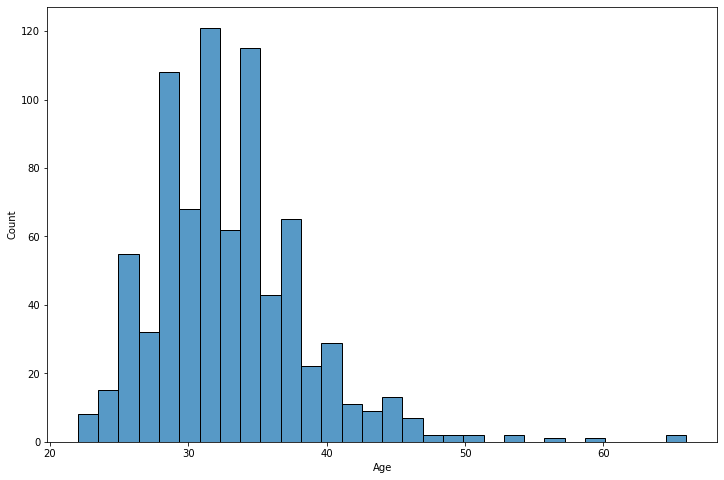

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='Age', ax=ax)
# ax.set_xlim(20, 70)
plt.show()

Tập trung trong khoảng $[25, 40]$

#### Gender

**Câu hỏi:**
- Số lượng nam nữ trong ngành IT ở Châu Âu chênh lệch như thế nào?
- Có giới tính thứ 3 trong bộ dữ liệu được thu thập không?

**Trả lời**

In [8]:
data = df.groupby('Gender')['Age'].count().reset_index().rename(columns={'Age': 'Count'})
data

,Gender,Count
0,Diverse,1
1,Female,115
2,Male,679


In [9]:
679 / 115

5.904347826086957

Cứ 6 nam sẽ có 1 nữ xuất hiện trong bộ dữ liệu. Cứ 679 nam sẽ có 1 `giới tính thứ 3` xuất hiện.

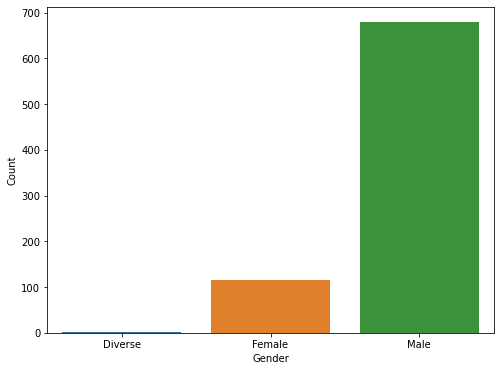

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=data, x='Gender', y='Count', ax=ax)
plt.show()

#### TotYrsOfExp

**Câu hỏi:**
- Người gắn bó với nghề lâu nhất là 30 năm, có đúng vậy không?
- Số năm kinh nghiệm ít nhất?
- Số người có nhiều năm kinh nghiệm trong nghề lớn hơn số lượng còn lại có đúng không?

**Trả lời:**

In [11]:
df['TotYrsOfExp'].max(), df['TotYrsOfExp'].min()

('9', '0')

In [12]:
df['TotYrsOfExp'].dtypes

dtype('O')

In [13]:
df['TotYrsOfExp'].unique()

array(['5', '7', '12', '17', '8', '15', '2', '11', '30', '18', '6', '10',
       '25', '3', '40', '13', '26', '4', '14', '19', '20', '9', '16',
       '0.8', '1.5', '21', '22', '2.5', '28', '29', '23', '1,5', '1',
       '27', '0', '1 (as QA Engineer) / 11 in total', '2,5',
       '15, thereof 8 as CTO', '31', '4.5', '3.5'], dtype=object)

In [14]:
data = []
for i in df['TotYrsOfExp'].values:
    try:
        datum = float(i)
        data.append(datum)
    except:
        continue
data = np.array(data)

In [15]:
data.max(), data.min()

(40.0, 0.0)

In [16]:
mean = data.mean()
mean

9.214032869785083

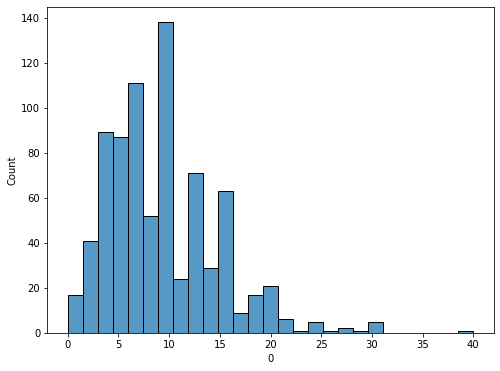

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=pd.DataFrame(data), x=0)
plt.show()

In [18]:
len(data[data > mean]), len(data[data <= mean])

(352, 439)

#### MainTech

**Câu hỏi:**
- Ngôn ngữ Python có phổ biến nhất trong số những người được khảo sát hay không?
- Ngôn ngữ nào được sử dụng nhiều nhất bởi các lập trình viên?
- Cột này chứa chỉ ngôn ngữ lập trình hay còn cái khác?

**Trả lời**

In [19]:
df['MainTech'] = df['MainTech'].str.lower()

In [20]:
df['MainTech']

0                    typescript
1                          ruby
2       javascript / typescript
4                       c# .net
5          aws, gcp, python,k8s
                 ...           
1248                       java
1249          consumer analysis
1250                        php
1251                 javascript
1252                       yaml
Name: MainTech, Length: 795, dtype: object

In [21]:
data = df['MainTech'].value_counts().reset_index()
data

,index,MainTech
0,java,147
1,python,135
2,javascript,51
3,php,45
4,c++,31
...,...,...
159,pl/sql,1
160,"java, terraform",1
161,terraform,1
162,several,1


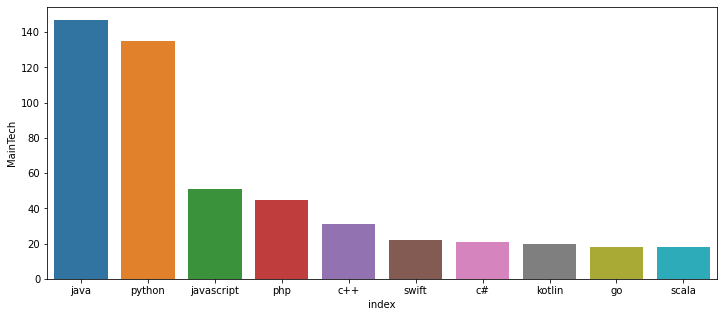

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=data.head(10), x='index', y='MainTech')
plt.show()

In [23]:
data.head(20).loc[[1, 10]].values

array([['python', 135],
       ['python ', 15]], dtype=object)

In [24]:
# đổi từ pythin sang python
df.loc[846,'MainTech'] = 'python'

Phải preprocessing khá nhiều

#### AnualSalary

**Câu hỏi:**
- Phân bố lương của các lập trình viên Châu Âu
- Lập trình viên Châu Âu lương cao không?
- Lương có cao hơn lập trình viên Việt Nam hay không?

**Trả lời:**

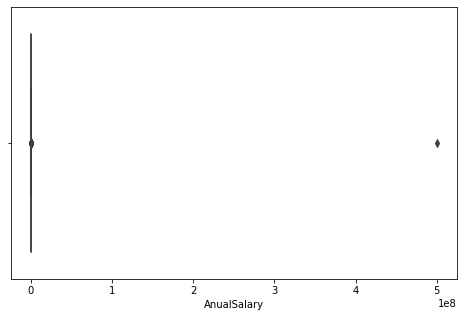

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='AnualSalary')
plt.show()

In [26]:
5 * 10 ** 8

500000000

Có một người phụ nữ 29 tuổi 1 năm kinh nghiệm làm ngôn ngữ Julia với mức lương $500,000,000$

In [27]:
def remove_outlier(df, x):
    q1, q3 = df.describe().loc[['25%', '75%']][x].values
    iqr = q3 - q1
    return df[(df[x] >= q1 - 1.5 * iqr) & (df[x] <= q3 + 1.5 * iqr)]

In [28]:
df = remove_outlier(df, 'AnualSalary')

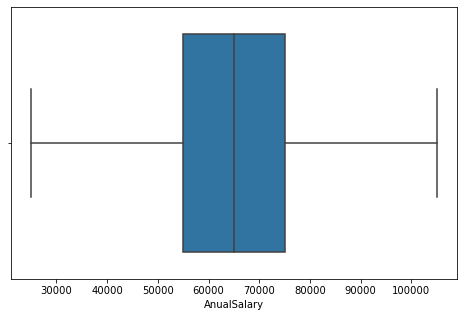

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='AnualSalary')
plt.show()

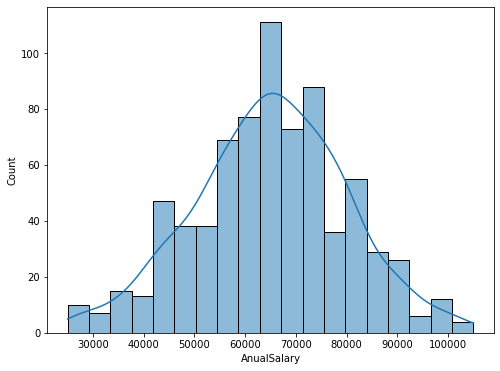

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='AnualSalary', kde=True)
plt.show()

In [31]:
df['AnualSalary'].mean()

64939.42307692308

Toàn: cho mình hỏi nam và nữ lương ai cao hơn? (lương trung bình)

Long: số năm kinh nghiệm có tỉ lệ với mức lương không 

Trung: Biết nhiều công nghệ có nhiều tiền không? (số lượng công nghệ có tỉ lệ thuận với lương không)

Bảo: liệu mình có thể dự đoán lương của dân DA từ dữ liệu trên ko?  (chưa đủ data để trả lời)
dựa trên maintech suy ra da rồi dự đoán được hông ( vd như để làm DA thì bạn cần biết như sql, python, thống kê...)?

Ly: Tuổi nào lương cao nhất (lương trung bình của độ tuổi)

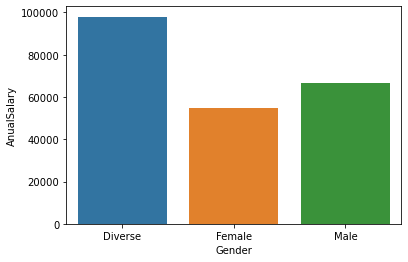

In [32]:
sns.barplot(data=df.groupby('Gender')['AnualSalary'].mean().reset_index(), x='Gender', y='AnualSalary')
plt.show()

- Mức lương của Nam nhiều hơn Nữ (chỉ so với trung bình).
- Mức lương trung bình của giới tính `Diverse` khá cao.

In [33]:
df['NumOfTech'] = df['MainTech'].str.split(',').apply(lambda x: len(x))

<ipython-input-33-9be1c3b4417e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumOfTech'] = df['MainTech'].str.split(',').apply(lambda x: len(x))


In [34]:
df

,Age,Gender,TotYrsOfExp,MainTech,AnualSalary,NumOfTech
0,26.0,Male,5,typescript,75000.0,1
1,26.0,Male,7,ruby,82000.0,1
2,29.0,Male,12,javascript / typescript,100000.0,1
4,37.0,Male,17,c# .net,62000.0,1
5,32.0,Male,5,"aws, gcp, python,k8s",76000.0,4
...,...,...,...,...,...,...
1248,31.0,Male,9,java,70000.0,1
1249,33.0,Male,10,consumer analysis,48000.0,1
1250,39.0,Male,15,php,90000.0,1
1251,26.0,Male,7,javascript,33800.0,1


In [35]:
df.groupby('NumOfTech')['AnualSalary'].mean().reset_index()

,NumOfTech,AnualSalary
0,1,65306.002805
1,2,61257.222222
2,3,50125.000000
3,4,59050.000000
4,5,45000.000000
5,6,65000.000000


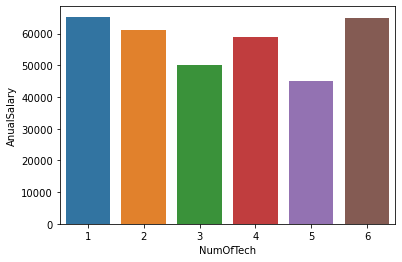

In [36]:
sns.barplot(data=df.groupby('NumOfTech')['AnualSalary'].mean().reset_index(), x='NumOfTech', y='AnualSalary')
plt.show()

(Nhiều công nghệ là lớn hơn 3) => Số lượng công nghệ không ảnh hưởng đến mức lương.

In [37]:
df.groupby('Age')['AnualSalary'].mean().reset_index().sort_values(by='AnualSalary', ascending=False)

,Age,AnualSalary
31,56.0,90000.000000
30,54.0,80000.000000
19,41.0,78377.777778
22,44.0,77083.333333
26,48.0,75000.000000
21,43.0,73575.000000
17,39.0,70500.000000
16,38.0,70181.935484
12,34.0,69892.982456
13,35.0,69796.363636


- 56 tuổi có mức lương trung bình cao nhất

**Trả lời câu hỏi của các bạn**

### Mức lương hằng năm có mối liên quan như thế nào với số năm kinh nghiệm?

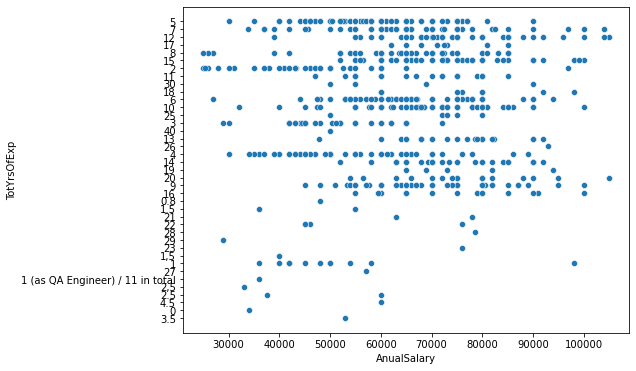

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='AnualSalary', y='TotYrsOfExp')
plt.show()

In [39]:
def remove_not_use(datum, x='TotYrsOfExp'):
    try:
        datum['TotYrsOfExp'] = float(datum['TotYrsOfExp'])
        return datum
    except:
        ...
    return None

In [40]:
df = df.T.apply(remove_not_use).T
df.dropna(inplace=True)

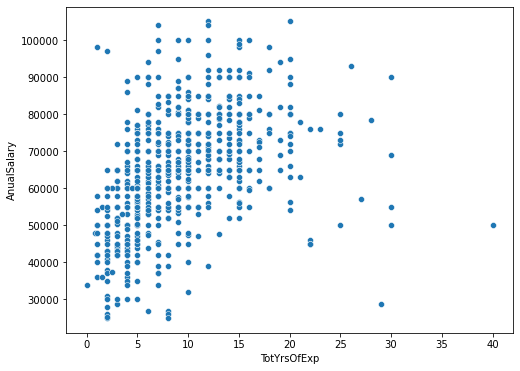

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='TotYrsOfExp', y='AnualSalary')
plt.show()

- Càng nhiều năm kinh nghiệm thì lương càng cao, nhưng hơn 20 năm kinh nghiệm thì chưa chắc điều đó.

In [42]:
df[['Age', 'TotYrsOfExp', 'AnualSalary']] = df[['Age', 'TotYrsOfExp', 'AnualSalary']].astype('float64')

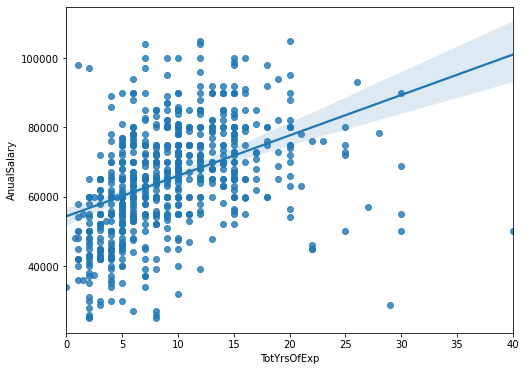

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=df, x='TotYrsOfExp', y='AnualSalary')
plt.show()

## Bài toán đặt ra: làm thế nào để dự đoán mức lương của một người khi biết số năm kinh nghiệm của họ

#### **trả lời:** Xây dựng mô hình dự báo

## Xây dựng mô hình Linear Regression

In [44]:
X = df[['TotYrsOfExp']].values
y = df['AnualSalary'].values
X.shape, y.shape

((751, 1), (751,))

In [45]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=4)
Xtrain.shape, Xvalid.shape

((600, 1), (151, 1))

In [46]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

### Kiểm tra mô hình Linear Regression

Hệ số $R^2$ có miền giá trị là $[0, 1]$. Dùng để đánh giá mức độ *tốt* của mô hình học máy. Càng gần $1$ càng tốt. Trên $0.5$ thì có thể tin cậy được mô hình.

In [47]:
ytrain_predicted = model.predict(Xtrain)
yvalid_predicted = model.predict(Xvalid)

In [48]:
print('R2 score của tập train %.2f' % (r2_score(ytrain, ytrain_predicted)))
print('R2 score của tập validate %.2f' % (r2_score(yvalid, yvalid_predicted)))

R2 score của tập train 0.16
R2 score của tập validate 0.23


### Giả sử dùng mô hình để dự đoán anh Ánh Xuân làm ở phòng IT Đức có số năm kinh nghiệm là 13 năm.

In [49]:
data = np.array([[13]])
predicted_data = model.predict(data)
print('Mức lương dự đoán của anh Ánh Xuân có 13 năm kinh nghiệm là %.2f' % (predicted_data))

Mức lương dự đoán của anh Ánh Xuân có 13 năm kinh nghiệm là 69479.38


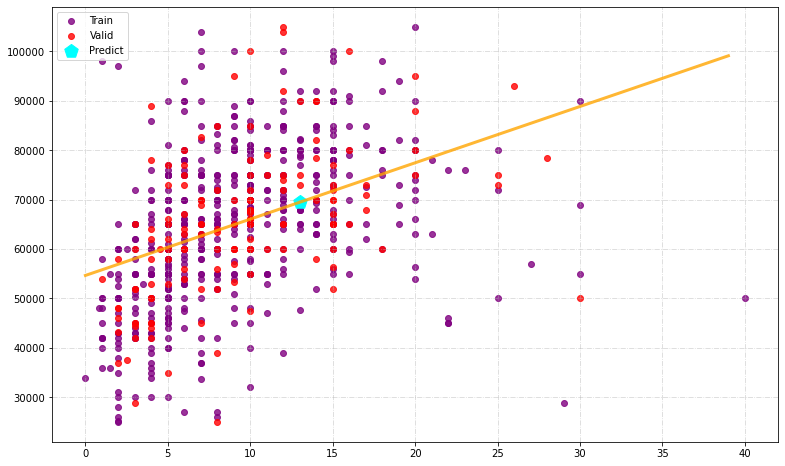

In [50]:
xx = np.arange(0, 40).reshape(-1, 1)
yy = model.predict(xx)
plt.figure(figsize=(13, 8))
plt.scatter(Xtrain, ytrain, label='Train', alpha=0.8, c='purple')
plt.scatter(Xvalid, yvalid, label='Valid', alpha=0.8, c='red')
plt.plot(xx, yy, c='orange', alpha=0.8, lw=3)
plt.scatter(data, predicted_data, label='Predict', marker='p', s=200, c='aqua')
plt.legend(loc='best')
plt.grid(True, alpha=0.5, ls='-.')
plt.show()

# Tổng hợp insights

- Các lập trình viên ở *Châu Âu* lớn hơn $30$ tuổi thường chiếm số lượng nhiều hơn còn lại.
- Tuổi đời của các lập trình viên ở Châu Âu $25$ - $40$ tuổi.
- Trung bình cứ có $6$ IT nam, thì có $1$ IT nữ.
- Và bộ dữ liệu này còn chứa giới tính thứ ba.
- Người gắn bó với nghề lâu nhất là $40$ năm (chứ không phải $30$) và người ít kinh nghiệm nhất là $0$.
- Số người có nhiều kinh nghiệm trong nghề (*hơn* mức trung bình) thì chiếm số lượng *ít* hơn những người còn lại.
- Ngôn ngữ **Java** đứng vị trí đầu bảng và ngôn ngữ **Python** chiếm vị trí thứ hai trong số những ngôn ngữ mà lập trình viên ở *Châu Âu* hay sử dụng nhất.
- Cột `MainTech` không hẳn chứa chỉ ngôn ngữ lập trình mà còn chứa công nghệ khác.
- Người có mức lương cao nhất ở bộ dữ liệu này là $500.000.000$ **EUR**.
- Phân bố lương ở Châu Âu khá đều (histogram có hình chuông) và công bằng. Duy chỉ có một vài người khảo sát có mức lương đặc biệt.
- Không thể biết lương cao hơn *Việt Nam* hay không do không đủ dữ liệu để so sánh.
- Mức lương của Nam nhiều hơn Nữ (chỉ so với trung bình).
- Mức lương trung bình của giới tính `Diverse` khá cao.
- (Nhiều công nghệ là lớn hơn 3) => Số lượng công nghệ không ảnh hưởng đến mức lương.
- 56 tuổi có mức lương trung bình cao nhất
- Dựa vào *scatter plot* thì có thể kết luận càng nhiều năm kinh nghiệm thì lương càng cao, nhưng hơn 20 năm kinh nghiệm thì chưa chắc điều đó.
- Dự đoán mức lương cho số năm kinh nghiệm 13 năm là $\approx 69479.38$ **EUR**